In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,root_mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
# List of ticker symbols
ticker = "NFLX"

# Download 10 years of daily closing price data
data = yf.download(ticker, period="10y")
data.to_csv(f"{ticker}_10yr_history.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-04-17,81.650002,82.142860,79.714287,79.778572,58306500
2015-04-20,81.055717,82.304283,80.381432,81.785713,30766400
2015-04-21,80.062859,81.484283,79.800003,81.234283,15925700
2015-04-22,79.668571,80.712860,79.544289,80.211426,12089700
2015-04-23,79.865715,80.342857,78.955711,79.655716,12687500


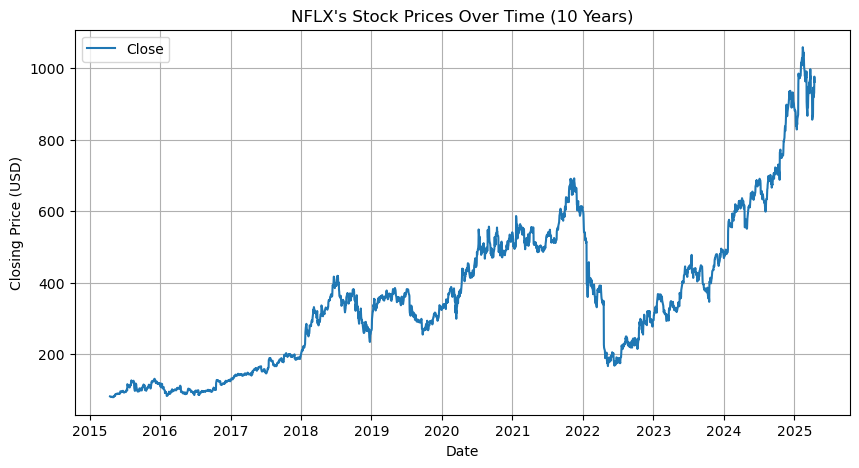

In [5]:
#Plot
plt.figure(figsize=(10,5))
plt.plot(data.index,data["Close"],label="Close")
plt.title(f"{ticker}'s Stock Prices Over Time (10 Years)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)

In [6]:
#Independent & Response Variable
X = data[["High","Low","Open","Volume"]]
Y = data["Close"]

In [7]:
#Training And Test Dataset
training_set = data[data.index<"2025-01-01"]
test_set = data[data.index >= "2025-01-01"]
x_train , x_test = X[X.index <"2025-01-01"] , X[X.index>= "2025-01-01"]
y_train , y_test = Y[Y.index <"2025-01-01"] , Y[Y.index>= "2025-01-01"]

In [8]:
#Shape
print("Train Shape:",x_train.shape)
print("Test Shape:",x_test.shape)

Train Shape: (2444, 4)
Test Shape: (72, 4)


In [9]:
#Training Model
reg = LinearRegression()

#Fit Model
model = reg.fit(x_train,y_train)

In [10]:
#Regression Metrics
coef = reg.coef_
intercept = reg.intercept_

In [11]:
#Prediction
y_pred = reg.predict(x_test)
y_pred.shape

(72, 1)

In [12]:
predict = pd.DataFrame(y_pred,index=y_test.index)
predict.rename(columns={0:"Close"},inplace=True)

In [13]:
diff = pd.concat([y_test,predict],axis = 1)
diff.rename(columns={f"{ticker}":"Actual Price","Close":"Predicted Price"},inplace=True)
diff

,Actual Price,Predicted Price
Date,,
2025-01-02,886.729980,883.733825
2025-01-03,881.049988,887.661774
2025-01-06,881.789978,878.939757
2025-01-07,879.190002,878.529058
2025-01-08,875.000000,879.973279
...,...,...
2025-04-10,921.169983,909.220731
2025-04-11,918.289978,929.144335
2025-04-14,931.280029,935.415206


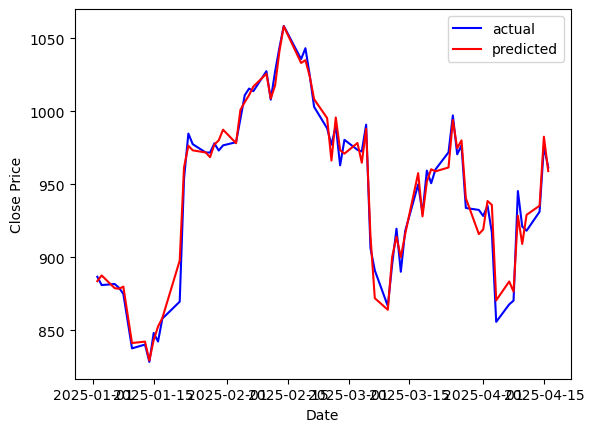

In [14]:
plt.plot(y_test,label="actual",color="blue")
plt.plot(predict,label="predicted",color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [15]:
diff.describe()

,Actual Price,Predicted Price
count,72.000000,72.000000
mean,945.694998,946.472247
std,58.100216,56.457658
min,828.400024,829.368190
25%,894.102478,900.262723
50%,959.889984,959.755509
75%,981.634995,983.893358
max,1058.599976,1058.369463


In [17]:
#Evaluate Model
mae = mean_absolute_error(y_test,predict)
mse = mean_squared_error(y_test,predict)
rmse = root_mean_squared_error(y_test,predict)
print("Mean Absolute Error: ", mae)
print("Mean Square Error: ", mse)
print("Root Mean Squared Error:" , rmse)

Mean Absolute Error:  6.460860668333485
Mean Square Error:  68.98855871860673
Root Mean Squared Error: 8.305935150156587


In [27]:
#Prediction for recent 10 dates
diff.drop(['Difference','Abs Diff'],axis=1,inplace = True)
diff.tail(10)

,Actual Price,Predicted Price
Date,,
2025-04-03,917.049988,935.935476
2025-04-04,855.859985,870.600510
2025-04-07,867.830017,883.501671
2025-04-08,870.400024,876.549558
2025-04-09,945.469971,928.559037
2025-04-10,921.169983,909.220731
2025-04-11,918.289978,929.144335
2025-04-14,931.280029,935.415206
2025-04-15,976.280029,982.687280
